<a href="https://colab.research.google.com/github/rayanecardozo/machine-learning-studies/blob/main/04_Regress%C3%A3o_Multivariadas_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem de Regress√£o Para Prever a Vari√°vel Peso (kg)

## Pr√©-processamento dos Dados

In [ ]:
# Importa√ß√£o de bibliotecas e pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from scipy import stats

In [ ]:
# Carregando e lendo o arquivo
df = pd.read_csv('dados_peso.csv')
df

matr_aluno  idade  altura (cm) sexo peso (kg) sono_h  exercicio_dias  \
0    20242510284   50.0        177.0    M        91      7             4.0   
1    20242510285    NaN          NaN  NaN       NaN    NaN             NaN   
2    20242510286    NaN          NaN  NaN       NaN    NaN             NaN   
3    20242510287    NaN          NaN  NaN       NaN    NaN             NaN   
4    20242510288    NaN          NaN  NaN       NaN    NaN             NaN   
..           ...    ...          ...  ...       ...    ...             ...   
183  20242510473   26.0        179.0    M       100    6.5             5.0   
184  20242510322   37.0        179.0    M        76      7             3.0   
185  20242510474    NaN          NaN  NaN       NaN    NaN             NaN   
186  20242510319   29.0        169.0    F        64      7             4.0   
187  20242510395   25.0        175.0    O        89      8             5.0   

     exercicio_min  alimentacao  sedentario_h agua_L  cafe_xic  refeicoes  \
0             45.0          1.0          12.0      2       4.0        4.0   
1              NaN          NaN           NaN    NaN       NaN        NaN   
2              NaN          NaN           NaN    NaN       NaN        NaN   
3              NaN          NaN           NaN    NaN       NaN        NaN   
4              NaN          NaN           NaN    NaN       NaN        NaN   
..             ...          ...           ...    ...       ...        ...   
183           60.0          1.0           8.0      2       2.0        4.0   
184           40.0          1.0          10.0    1.5       3.0        4.0   
185            NaN          NaN           NaN    NaN       NaN        NaN   
186           45.0          1.0          13.0      2       0.0        4.0   
187           45.0          1.0          13.0      2       3.0        4.0   

                        polo  
0                 Vila Velha  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
183                    Viana  
184                 Colatina  
185                      NaN  
186                 Colatina  
187  Cachoeiro de Itapemirim  

[188 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   matr_aluno      188 non-null    int64  
 1   idade           134 non-null    float64
 2   altura (cm)     134 non-null    float64
 3   sexo            134 non-null    object 
 4   peso (kg)       134 non-null    object 
 5   sono_h          134 non-null    object 
 6   exercicio_dias  134 non-null    float64
 7   exercicio_min   134 non-null    float64
 8   alimentacao     134 non-null    float64
 9   sedentario_h    134 non-null    float64
 10  agua_L          134 non-null    object 
 11  cafe_xic        134 non-null    float64
 12  refeicoes       135 non-null    float64
 13  polo            134 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 20.7+ KB


In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

matr_aluno         0
idade             54
altura (cm)       54
sexo              54
peso (kg)         54
sono_h            54
exercicio_dias    54
exercicio_min     54
alimentacao       54
sedentario_h      54
agua_L            54
cafe_xic          54
refeicoes         53
polo              54
dtype: int64


In [ ]:
# Removendo entradas onde as colunas principais est√£o ausentes
colunas_principais = ['idade', 'altura (cm)', 'sexo', 'peso (kg)', 'sono_h',
                      'exercicio_dias', 'exercicio_min', 'alimentacao',
                      'sedentario_h', 'agua_L', 'cafe_xic', 'refeicoes', 'polo']
df = df.dropna(subset=colunas_principais)

In [ ]:
# Removendo espa√ßos e convertendo v√≠rgula para ponto se houver
df['peso (kg)'] = df['peso (kg)'].astype(str).str.replace(',', '.').astype(float)
df['sono_h'] = df['sono_h'].astype(str).str.replace(',', '.').astype(float)
df['agua_L'] = df['agua_L'].astype(str).str.replace(',', '.').astype(float)

<ipython-input-236-1feb2e9be7b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peso (kg)'] = df['peso (kg)'].astype(str).str.replace(',', '.').astype(float)
<ipython-input-236-1feb2e9be7b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sono_h'] = df['sono_h'].astype(str).str.replace(',', '.').astype(float)
<ipython-input-236-1feb2e9be7b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
# Convertendo tipos
df['alimentacao'] = df['alimentacao'].astype(int)
df['cafe_xic'] = df['cafe_xic'].astype(float)
df['refeicoes'] = df['refeicoes'].astype(float)

# Codificando vari√°veis categ√≥ricas
df = df[df['sexo'].isin(['M', 'F', 'O'])]
df['sexo'] = df['sexo'].map({'M': 0, 'F': 1, 'O': 2})

df = df[df['polo'].isin(['Vit√≥ria', 'Vila Velha', 'Viana', 'Colatina'])]
df['polo'] = df['polo'].map({
    'Vit√≥ria': 0,
    'Vila Velha': 1,
    'Viana': 2,
    'Colatina': 3
})

# Resetando √≠ndice
df.reset_index(drop=True, inplace=True)

<ipython-input-237-f27026a9397c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alimentacao'] = df['alimentacao'].astype(int)
<ipython-input-237-f27026a9397c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cafe_xic'] = df['cafe_xic'].astype(float)
<ipython-input-237-f27026a9397c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

## An√°lise Explorat√≥ria e Estat√≠stica Descritiva

In [ ]:
# Estat√≠sticas descritivas para vari√°veis num√©ricas
df.describe()

matr_aluno       idade  altura (cm)        sexo   peso (kg)  \
count  1.140000e+02  114.000000   114.000000  114.000000  114.000000   
mean   2.024251e+10   35.394737   174.429825    0.166667   84.121930   
std    5.437967e+01    8.177909     8.074837    0.374323   19.552415   
min    2.024251e+10   22.000000   155.000000    0.000000   52.500000   
25%    2.024251e+10   29.000000   170.000000    0.000000   71.250000   
50%    2.024251e+10   34.000000   174.000000    0.000000   82.000000   
75%    2.024251e+10   39.000000   180.000000    0.000000   95.000000   
max    2.024251e+10   62.000000   197.000000    1.000000  180.000000   

           sono_h  exercicio_dias  exercicio_min  alimentacao  sedentario_h  \
count  114.000000      114.000000     114.000000   114.000000    114.000000   
mean     6.907018        3.131579      51.631579     1.140351     10.052632   
std      0.956461        1.893226      28.960230     0.477404      2.214562   
min      3.000000        0.000000       0.000000     1.000000      4.000000   
25%      6.000000        2.000000      40.000000     1.000000      8.250000   
50%      7.000000        3.000000      60.000000     1.000000     10.000000   
75%      7.500000        4.000000      60.000000     1.000000     12.000000   
max      9.000000        7.000000     180.000000     3.000000     16.000000   

           agua_L    cafe_xic   refeicoes        polo  
count  114.000000  114.000000  114.000000  114.000000  
mean     2.414035    2.333333    3.885965    1.412281  
std      0.935426    1.994092    0.817494    1.165973  
min      1.000000    0.000000    2.000000    0.000000  
25%      2.000000    1.000000    3.000000    0.000000  
50%      2.000000    2.000000    4.000000    1.000000  
75%      3.000000    4.000000    4.000000    2.750000  
max      6.000000   10.000000    7.000000    3.000000

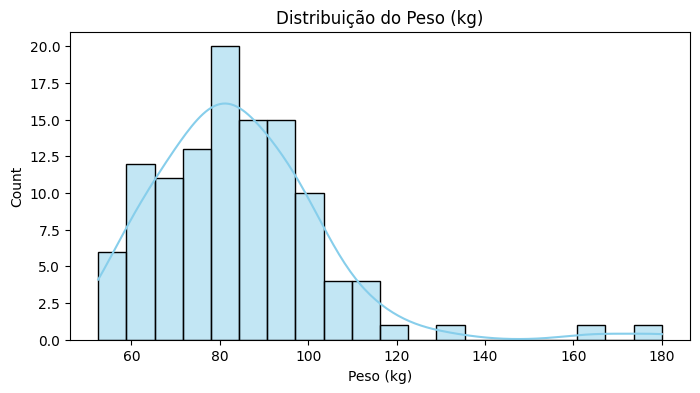

In [ ]:
# Distribui√ß√£o do peso (target)
plt.figure(figsize=(8, 4))
sns.histplot(df['peso (kg)'], kde=True, bins=20, color='skyblue')
plt.title("Distribui√ß√£o do Peso (kg)")
plt.xlabel("Peso (kg)")
plt.show()

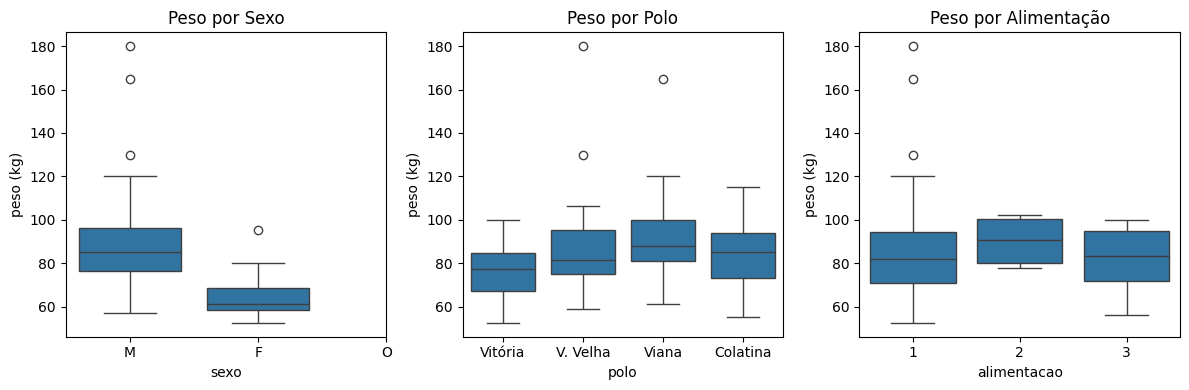

In [ ]:
# Boxplots por vari√°veis categ√≥ricas
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x='sexo', y='peso (kg)', data=df)
plt.title("Peso por Sexo")
plt.xticks([0, 1, 2], ['M', 'F', 'O'])

plt.subplot(1, 3, 2)
sns.boxplot(x='polo', y='peso (kg)', data=df)
plt.title("Peso por Polo")
plt.xticks([0, 1, 2, 3], ['Vit√≥ria', 'V. Velha', 'Viana', 'Colatina'])

plt.subplot(1, 3, 3)
sns.boxplot(x='alimentacao', y='peso (kg)', data=df)
plt.title("Peso por Alimenta√ß√£o")

plt.tight_layout()
plt.show()

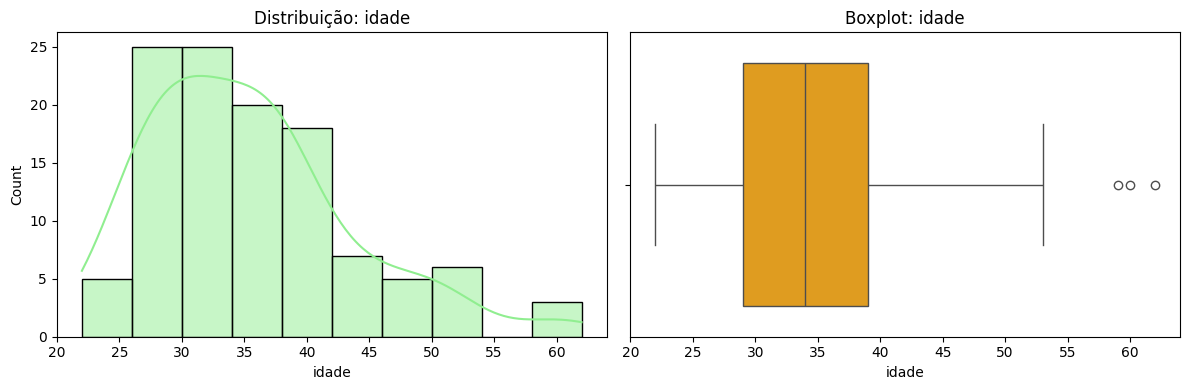

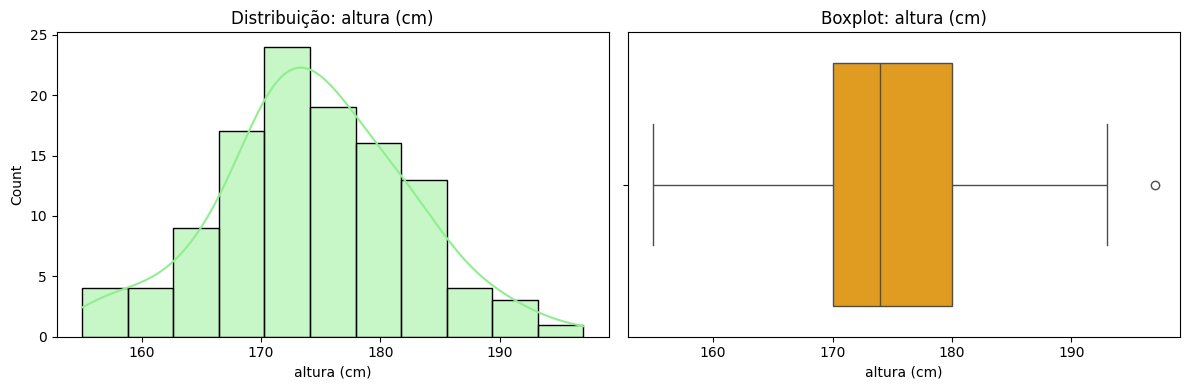

KeyboardInterrupt: 

In [ ]:
# Histograma + Boxplot para vari√°veis num√©ricas
numericas = ['idade', 'altura (cm)', 'sono_h', 'exercicio_dias', 'exercicio_min',
             'sedentario_h', 'agua_L', 'cafe_xic', 'refeicoes']

for col in numericas:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[col], kde=True, ax=ax[0], color='lightgreen')
    ax[0].set_title(f'Distribui√ß√£o: {col}')

    sns.boxplot(x=df[col], ax=ax[1], color='orange')
    ax[1].set_title(f'Boxplot: {col}')

    plt.tight_layout()
    plt.show()

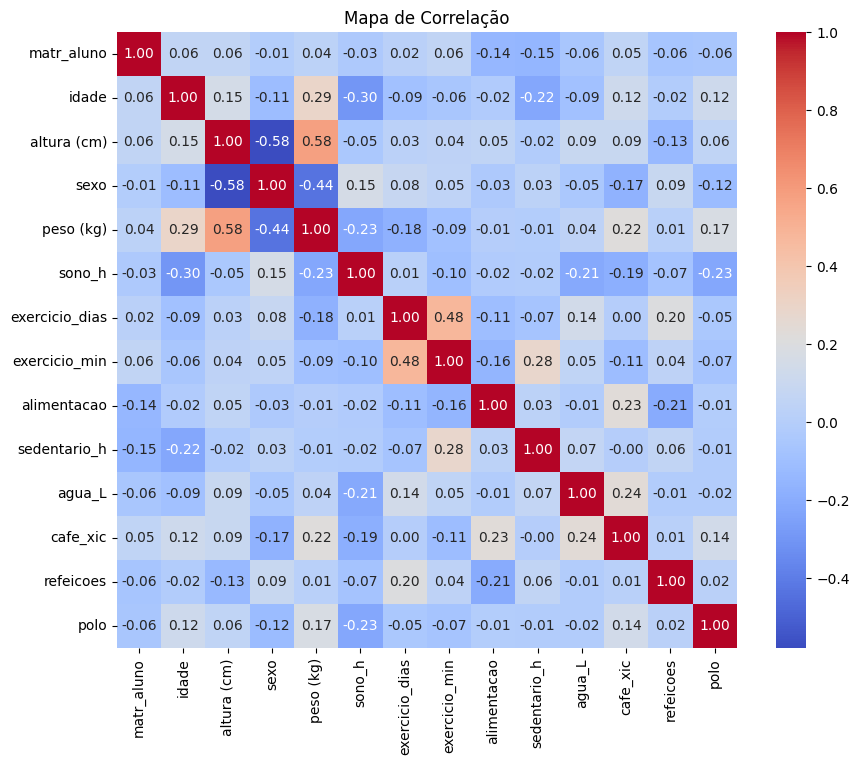

In [ ]:
# Mapa de correla√ß√£o com destaque para peso
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correla√ß√£o")
plt.show()

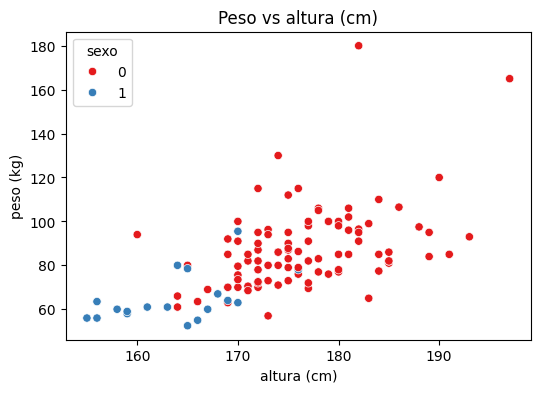

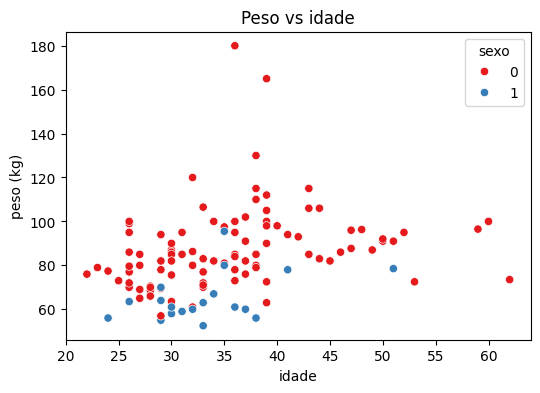

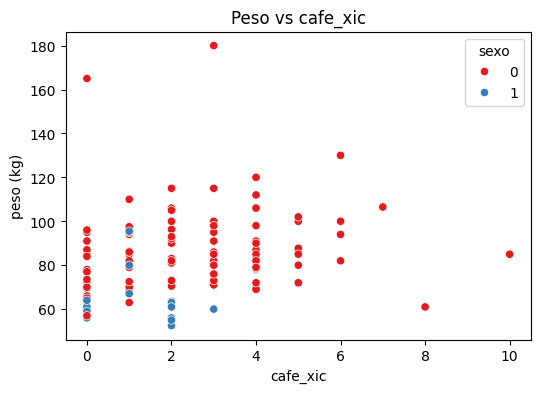

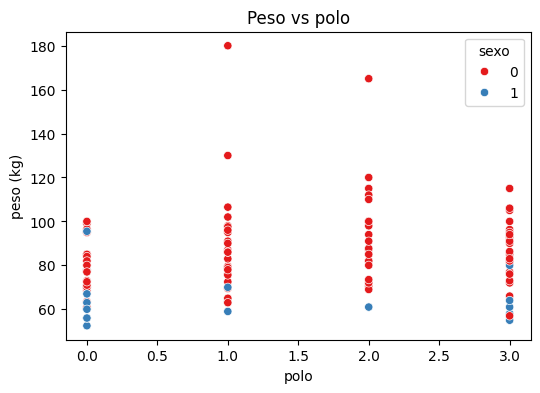

In [ ]:
# Gr√°ficos de dispers√£o entre as vari√°veis mais correlacionadas com peso
variaveis_relevantes = correlacoes_peso.index[1:5]  # As 4 mais correlacionadas (exclui o pr√≥prio peso)

for var in variaveis_relevantes:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=var, y='peso (kg)', hue='sexo', palette='Set1')
    plt.title(f"Peso vs {var}")
    plt.show()

In [ ]:
# Correla√ß√£o com a vari√°vel o target
correlacoes_peso = corr['peso (kg)'].sort_values(ascending=False)
print("\nCorrela√ß√£o com o peso:")
print(correlacoes_peso)


Correla√ß√£o com o peso:
peso (kg)         1.000000
altura (cm)       0.575690
idade             0.294193
cafe_xic          0.218614
polo              0.174203
agua_L            0.038483
matr_aluno        0.036911
refeicoes         0.013722
alimentacao      -0.005642
sedentario_h     -0.008590
exercicio_min    -0.089039
exercicio_dias   -0.176988
sono_h           -0.226799
sexo             -0.435671
Name: peso (kg), dtype: float64


##	Divis√£o dos dados e valida√ß√£o cruzada

In [ ]:
# Sele√ß√£o das features e o target
X = df.drop(columns=['matr_aluno', 'peso (kg)'])  # Excluindo o ID e alvo
y = df['peso (kg)']

In [ ]:
# Dividir em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Resultados m√©dios
print("üîé Resultados com K-Fold (10 folds):")
print(f"  ‚Ä¢ MSE m√©dio: {np.mean(mse_scores):.2f}")
print(f"  ‚Ä¢ R¬≤ m√©dio: {np.mean(r2_scores):.2f}")

üîé Resultados com K-Fold (10 folds):
  ‚Ä¢ MSE m√©dio: 263.54
  ‚Ä¢ R¬≤ m√©dio: 0.21


## Sele√ß√£o de modelos e m√©tricas de avalia√ß√£o

In [ ]:
# Escolhendo os algoritmos: regress√£o linear, KNN e Random Forest
modelos = {
    'Regress√£o Linear': LinearRegression(),
    '√Årvore de Decis√£o': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# M√©tricas escolhidas: MAE, MSE e R2
# Avalia√ß√£o com K-Fold (10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

resultados = {}

for nome_modelo, modelo in modelos.items():
    mse_scores = []
    mae_scores = []
    r2_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    resultados[nome_modelo] = {
        'MSE M√©dio': np.mean(mse_scores),
        'MAE M√©dio': np.mean(mae_scores),
        'R¬≤ M√©dio': np.mean(r2_scores)
    }

In [ ]:
# DataFrame com resultados para plot
df_resultados = pd.DataFrame(resultados).T
df_resultados

MSE M√©dio  MAE M√©dio  R¬≤ M√©dio
Regress√£o Linear   263.541727  11.637187  0.207462
√Årvore de Decis√£o  466.955629  14.953258 -0.629061
Random Forest      270.620848  11.350315  0.122338

## 	Ajuste dos modelos e otimiza√ß√£o de hiperpar√¢metros

In [ ]:
# Ajuste de Hiperpar√¢metros com GridSearchCV
# Grid Search ‚Äì √Årvore de Decis√£o
parametros_dt = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=parametros_dt,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_dt.fit(X, y)

print("Melhores par√¢metros - √Årvore de Decis√£o:")
print(grid_dt.best_params_)

Melhores par√¢metros - √Årvore de Decis√£o:
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Grid Search ‚Äì √Årvore de Decis√£o
parametros_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=parametros_rf,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_rf.fit(X, y)

print("Melhores par√¢metros - Random Forest:")
print(grid_rf.best_params_)

Melhores par√¢metros - Random Forest:
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# Avaliando os modelos com os melhores hiperpar√¢metros
melhor_dt = grid_dt.best_estimator_
melhor_rf = grid_rf.best_estimator_

for nome, modelo in zip(['√Årvore de Decis√£o Otimizada', 'Random Forest Otimizada'], [melhor_dt, melhor_rf]):
    y_pred = modelo.predict(X)
    print(f"\nModelo: {nome}")
    print("MSE:", mean_squared_error(y, y_pred))
    print("MAE:", mean_absolute_error(y, y_pred))
    print("R¬≤ :", r2_score(y, y_pred))


Modelo: √Årvore de Decis√£o Otimizada
MSE: 228.8048028476989
MAE: 10.7582120518688
R¬≤ : 0.3962033308280968

Modelo: Random Forest Otimizada
MSE: 66.86248213097713
MAE: 5.197690332091258
R¬≤ : 0.8235555219960895


## Resultados Finais

### üîç An√°lise dos gr√°ficos

Altura vs Peso: Correla√ß√£o forte e positiva. Pessoas mais altas tendem a pesar mais. A altura √© a melhor vari√°vel preditora para o peso, com grande impacto no modelo.

Idade vs Peso: Correla√ß√£o fraca e dispersa. Embora possa ser inclu√≠da no modelo, n√£o parece ter grande impacto isolado.

Sono vs Peso: Distribui√ß√£o dispersa e sem rela√ß√£o forte. Possivelmente irrelevante para a predi√ß√£o direta.

Sedentarismo vs Peso: Correla√ß√£o fraca ou nula. Pode ser relevante em intera√ß√µes, mas n√£o sozinha.

Exerc√≠cio vs Peso: H√° uma tend√™ncia leve (mais exerc√≠cios, menor peso), mas com outliers. Pode ser relevante como moderador, mas n√£o linearmente.

√Ågua vs Peso: Tend√™ncia fraca e confusa. Pode n√£o ser relevante para uma regress√£o direta.

Sexo vs Peso: O sexo tem uma influ√™ncia significativa, com a m√©dia de peso dos homens sendo visivelmente maior que das mulheres. A correla√ß√£o negativa (r = -0.43) confirma que sexo pode ser uma vari√°vel importante no modelo de regress√£o.

Polo vs Peso: As diferen√ßas entre polos s√£o pequenas e com baixa correla√ß√£o (r = 0.17). Embora tenha alguma varia√ß√£o, o polo tem pouca influ√™ncia sobre o peso e n√£o deve ter grande impacto preditivo no modelo.

A altura √© a principal vari√°vel preditora do peso. Outras vari√°veis como sexo, exerc√≠cio, e idade podem contribuir, mas com menor impacto. Vari√°veis como sono, sedentarismo, √°gua e polo t√™m pouco impacto isoladamente, mas podem ser relevantes em intera√ß√µes ou em modelos mais complexos.

### Desempenho dos modelos
Regress√£o Linear:

MSE: 263.54, o que sugere erros moderados (~16.25). Pode ser melhorado com ajustes no modelo.

MAE: 11.64, indicando que o modelo erra em m√©dia 11.64 kg nas previs√µes do peso.

R¬≤: 0.207, explicando apenas 20.7% da varia√ß√£o no peso. O modelo n√£o captura bem as rela√ß√µes dos dados.

√Årvore de Decis√£o:

MSE: 466.96, mais alto que o da regress√£o linear, indicando erros maiores.

MAE: 14.95, sugerindo um erro m√©dio maior nas previs√µes de peso.

R¬≤: -0.629, desempenho pior que a m√©dia dos valores, indicando overfitting ou modelagem inadequada.

Random Forest:

MSE: 270.62, semelhante ao da regress√£o linear, com erro moderado e mais robusto.

MAE: 11.35, mais preciso que a √Årvore de Decis√£o.

R¬≤: 0.122, muito baixo, indicando que o modelo n√£o est√° capturando bem a complexidade dos dados.

Conclus√£o:
A Regress√£o Linear se destaca como o melhor modelo, com erro controlado, mas ainda precisando de ajustes.

A √Årvore de Decis√£o apresenta os piores resultados, provavelmente devido ao overfitting.

A Random Forest tem desempenho melhor que a √Årvore de Decis√£o, mas ainda n√£o explica bem a variabilidade dos dados.

### Resultados dos Modelos Otimizados
√Årvore de Decis√£o Otimizada:

MSE: 228.80, um erro mais baixo comparado ao modelo anterior, indicando melhorias nas previs√µes.

MAE: 10.76, erro m√©dio de aproximadamente 10.76 kg, o que tamb√©m √© uma melhoria.

R¬≤: 0.396, agora o modelo explica 39.6% da variabilidade dos dados, um aumento significativo em rela√ß√£o ao modelo anterior.

Random Forest Otimizada:

MSE: 66.86, um erro muito baixo, indicando previs√µes mais precisas.

MAE: 5.20, erro m√©dio de apenas 5.20 kg, excelente precis√£o.

R¬≤: 0.824, com o modelo explicando 82.4% da variabilidade dos dados, mostrando um desempenho muito bom.

Conclus√£o:
A Random Forest Otimizada apresenta o melhor desempenho, com um MSE muito baixo e um R¬≤ de 0.824, indicando que o modelo est√° explicando a maior parte da variabilidade dos dados. A √Årvore de Decis√£o Otimizada tamb√©m teve melhorias, com um R¬≤ de 0.396, mas ainda est√° atr√°s da Random Forest em termos de precis√£o e capacidade explicativa.